<a href="https://colab.research.google.com/github/AbiramiMuthu/Tensorflow-CNN-CIFAR10/blob/main/TensorFlow_CNN_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the mlxtend library aids in plotting good confusion matrix

In [ ]:
!pip install mlxtend==0.17.0

## Load Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Add Data

In [ ]:
dataset= keras.datasets.cifar10

In [ ]:
(x_train,y_train),(x_test,y_test)=dataset.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
np.max(x_train)

255

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

## Build Model

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [ ]:
history=model.fit(x_train,y_train,batch_size=10,epochs=10,verbose=True,validation_split=0.2)

Epoch 1/10
4000/4000 [==============================] - 165s 41ms/step - loss: 1.3953 - sparse_categorical_accuracy: 0.4983 - val_loss: 1.1822 - val_sparse_categorical_accuracy: 0.5834
Epoch 2/10
4000/4000 [==============================] - 163s 41ms/step - loss: 1.0762 - sparse_categorical_accuracy: 0.6196 - val_loss: 0.9940 - val_sparse_categorical_accuracy: 0.6533
Epoch 3/10
4000/4000 [==============================] - 164s 41ms/step - loss: 0.9502 - sparse_categorical_accuracy: 0.6671 - val_loss: 0.9517 - val_sparse_categorical_accuracy: 0.6662
Epoch 4/10
4000/4000 [==============================] - 163s 41ms/step - loss: 0.8622 - sparse_categorical_accuracy: 0.6949 - val_loss: 0.9139 - val_sparse_categorical_accuracy: 0.6846
Epoch 5/10
4000/4000 [==============================] - 163s 41ms/step - loss: 0.7962 - sparse_categorical_accuracy: 0.7160 - val_loss: 0.9517 - val_sparse_categorical_accuracy: 0.6727
Epoch 6/10
4000/4000 [==============================] - 163s 41ms/step - lo

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)


313/313 [==============================] - 8s 25ms/step - loss: 1.0227 - sparse_categorical_accuracy: 0.6847


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
history.history

{'loss': [1.3953498601913452,
  1.0761735439300537,
  0.9501578211784363,
  0.8622178435325623,
  0.7962294220924377,
  0.7360683679580688,
  0.6807258129119873,
  0.6301170587539673,
  0.5865521430969238,
  0.5502578616142273],
 'sparse_categorical_accuracy': [0.4982999861240387,
  0.6195999979972839,
  0.667074978351593,
  0.6948500275611877,
  0.7160000205039978,
  0.7390499711036682,
  0.7573750019073486,
  0.7764999866485596,
  0.7928000092506409,
  0.8044250011444092],
 'val_loss': [1.1821595430374146,
  0.9939923882484436,
  0.951667308807373,
  0.9138538241386414,
  0.9516527056694031,
  0.941683292388916,
  0.9216210842132568,
  0.9407808780670166,
  0.9552437663078308,
  1.0116264820098877],
 'val_sparse_categorical_accuracy': [0.5834000110626221,
  0.6532999873161316,
  0.6661999821662903,
  0.6845999956130981,
  0.6726999878883362,
  0.6732000112533569,
  0.6915000081062317,
  0.6898999810218811,
  0.6901999711990356,
  0.6913999915122986]}

### Plotting the results

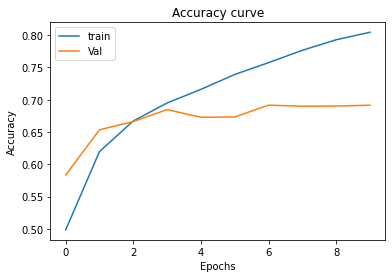

In [ ]:
plt.plot(history.history["sparse_categorical_accuracy"])
plt.plot(history.history["val_sparse_categorical_accuracy"])
plt.legend(['train','Val'])
plt.title("Accuracy curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

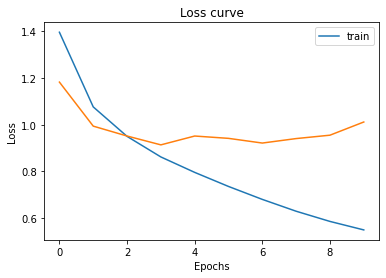

In [ ]:
plt.plot(history.history["loss"])
plt.legend(['train','Val'])
plt.plot(history.history["val_loss"])
plt.title("Loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Confusion Matrix

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd05b457c90>)

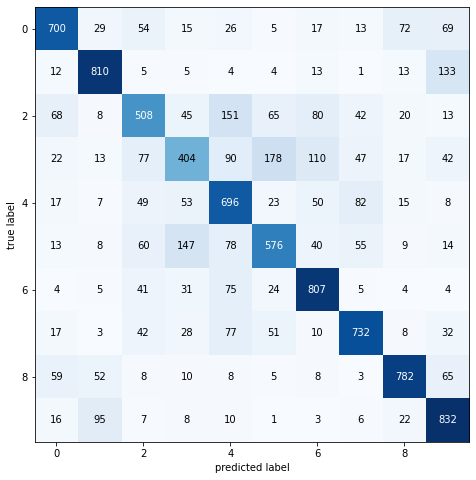

In [ ]:
mat=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(mat,figsize=(8,8))